<a href="https://colab.research.google.com/github/soueuwilliam/aprendizadoDeMaquina/blob/main/tutoriais/Crashcourse_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

 A biblioteca [Pandas](https://pandas.pydata.org/docs/index.html) é uma ferramenta de análise e manipulação de dados em Python. Ela oferece estruturas de dados poderosas e flexíveis para facilitar o trabalho com dados tabulares e séries temporais.

Graças à sua sintaxe simples e eficiente, o Pandas é amplamente utilizado em ciência de dados, análise financeira, bioinformática, engenharia e muitas outras áreas onde o trabalho com dados é essencial.

O pandas fornece dois tipos de classes para gerenciamento de dados:

- Series: uma matriz unidimensional rotulada contendo dados de qualquer tipo
como inteiros, strings, objetos Python etc.
- DataFrame: uma estrutura de dados bidimensional que contém dados como uma matriz bidimensional ou uma tabela com linhas e colunas.

O DataFrame, que é essencialmente uma tabela bidimensional com linhas e colunas rotuladas, permite que você realize operações de forma eficiente em grandes conjuntos de dados, incluindo seleção, filtragem, agregação, limpeza, transformação e visualização de dados.

Vale dizer que o Pandas é construído sobre o [NumPy](https://numpy.org/) e estende suas funcionalidades, fornecendo estruturas de dados de alto nível e ferramentas para análise de dados. Então, ao trabalhar com dados, muitas vezes você usará tanto Pandas quanto NumPy juntos, aproveitando as vantagens de ambas as bibliotecas para análise e manipulação de dados.

Além disso, o Pandas possui integração direta com [Matplotlib](https://matplotlib.org/), o que facilita a visualização de dados armazenados em estruturas de dados do Pandas.

Dessa forma, o Pandas fornece métodos convenientes para criar gráficos diretamente a partir de objetos DataFrame e Series usando Matplotlib. Isso simplifica o processo de criação de visualizações a partir de dados Pandas, eliminando a necessidade de escrever código adicional para preparar os dados para plotagem.

# Importar o Pandas

Para utilizar os recursos do Pandas é necessário realizar a importação. Em geral, para facilitar, é adicionado um _alias_ no pacote.

Vamos aproveitar também para importar o Numpy e o Matplotlib, também usando um _alias_.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Criando DataFrames

Existem algumas maneiras para criar um DataFrame no Pandas. Além da ideia de utilizar Nympy arrays ou Series para preencher um DataFrame, vamos ver algumas outras maneiras nas próximas seções.

## Lista de Dicionários

A partir de uma lista de dicionários, conseguimos preencher um DataFrame por linhas, em que cada entrada da lista se transforma em uma nova linha do DataFrame.

In [2]:
list_of_dicts = [
    {"name": "Ginger", "breed": "Dachshund", "height_cm": 22, "weight_kg": 10, "date_of_birth": "2019-03-14"},
    {"name": "Scout", "breed": "Dalmatian", "height_cm": 59, "weight_kg": 25, "date_of_birth": "2019-05-09"}
    ]
df = pd.DataFrame(list_of_dicts)
df

,name,breed,height_cm,weight_kg,date_of_birth
0,Ginger,Dachshund,22,10,2019-03-14
1,Scout,Dalmatian,59,25,2019-05-09


## Dicionário de listas

Uma outra abordagem é preencher o DataFrame coluna por coluna. Para isso, podemos utilizar um dicionário de listas.

In [3]:
dict_of_lists = {
    "name": ["Ginger", "Scout"],
    "breed": ["Dachshund", "Dalmatian"],
    "height_cm": [22, 59],
    "weight_kg": [10, 25],
    "date_of_birth": ["2019-03-14", "2019-05-09"]
    }
df = pd.DataFrame(dict_of_lists)
df

,name,breed,height_cm,weight_kg,date_of_birth
0,Ginger,Dachshund,22,10,2019-03-14
1,Scout,Dalmatian,59,25,2019-05-09


# Importando e exportando dados

Em muitas situações (talvez, a maioria), os dados a serem analisados estão armazenados em fontes externas. O Pandas possui um amplo conjunto de métodos para fazer a leitura e escrita de arquivos em formatos específicos. Uma lista completa dos formatos pode ser vista [aqui](https://pandas.pydata.org/docs/user_guide/io.html).

Para fins de exemplificação, vamos trabalhar com um formato bastante comum, o CSV.

Para a maior parte deste Notebooke, vamos usar uma base de dados com informações sobre salário para cargos na área de Ciência de Dados. Os dados foram coletados nesse [repostório no Kaggle](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries).

Primeiro, vamos trazer para o ambiente do Google Colab um conjunto de dados.

In [6]:
!wget https://raw.githubusercontent.com/danielsabino/IMD1101-AM-2024.1/main/data/ds_salaries.csv

--2024-06-26 14:34:31--  https://raw.githubusercontent.com/danielsabino/IMD1101-AM-2024.1/main/data/ds_salaries.csv
Resolvendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Conectando-se a raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 36961 (36K) [text/plain]
Salvando em: ‘ds_salaries.csv’

ds_salaries.csv     100%[===================>]  36,09K  --.-KB/s    em 0,002s  

2024-06-26 14:34:31 (16,5 MB/s) - ‘ds_salaries.csv’ salvo [36961/36961]



Agora, para fazer preencher um DataFrame com os referidos dados, basta usar o método `.read_csv()`.

In [7]:
df = pd.read_csv('ds_salaries.csv')

De maneira semalhante, se quisermos salvar o conteúdo de DataFrame em um arquivo CSV, basta usar o método `.to_csv()`.

In [8]:
df.to_csv('arquivo.csv')

# Métodos e atributos básicos

Assim que uma base de dados é carregada, a primeira coisa a fazer é explorar e verificar o que contém nela. Alguns métodos podem ser usados para obter algumas informações úteis:

- `head()`: retorna as primeiras linhas da dataframe - bom para ver exemplos de valores que estão armazenados;
- `tail()`: retorna as últimas linhas da dataframe - bom para ver exemplos de valores que estão armazenados;
- `info()`: mostra informações para cada coluna, como o tipo de cada uma delas e a quantidade de valores faltosos;
- `describe()`: traz algumas estatísticas básicas para cada coluna;
- `shape`: mostra a quantidade de linhas e colunas do dataframe.

In [9]:
df.head()

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [10]:
df.tail()

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [12]:
df.describe()

,id,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [13]:
df.shape

(607, 12)

# Estrutura de um DataFrame

Para melhor entender um objeto do tipo DataFrame, é importante entender que eles são compostos de três componentes básicos, que podem ser acessados por meio dos seguintes atributos:

- `values`: um array NumPy bidimensional com os valores armazenados no DataFrame;
- `columns`: um índice com os nomes das colunas;
- `index`: um índice para as linhas - podem ser números ou nomes.

PS: um índice é um tipo de dados do Pandas (`index`), que pode ser enxergado como uma lista de strings ou números.

In [14]:
df.values

array([[0, 2020, 'MI', ..., 0, 'DE', 'L'],
       [1, 2020, 'SE', ..., 0, 'JP', 'S'],
       [2, 2020, 'SE', ..., 50, 'GB', 'M'],
       ...,
       [604, 2022, 'SE', ..., 0, 'US', 'M'],
       [605, 2022, 'SE', ..., 100, 'US', 'M'],
       [606, 2022, 'MI', ..., 100, 'US', 'L']], dtype=object)

In [15]:
df.columns

Index(['id', 'work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [16]:
df.index

RangeIndex(start=0, stop=607, step=1)

# Ordenando e selecionando

## Ordenando linhas

Um opção interessante para analisar os dados é realizar a ordenação a partir de uma coluna específica. Para isso, podemos usar o método `sort_values()`.

In [17]:
df.sort_values('work_year')

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
51,51,2020,EN,FT,Data Analyst,91000,USD,91000,US,100,US,L
50,50,2020,EN,FT,Data Analyst,450000,INR,6072,IN,0,IN,S
49,49,2020,MI,FT,Data Engineer,61500,EUR,70139,FR,50,FR,L
48,48,2020,MI,FT,Data Scientist,105000,USD,105000,US,100,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
391,391,2022,MI,FT,AI Scientist,120000,USD,120000,US,0,US,M
390,390,2022,MI,FT,Machine Learning Engineer,75000,GBP,98158,GB,0,GB,M
389,389,2022,MI,FT,Machine Learning Engineer,95000,GBP,124333,GB,0,GB,M
396,396,2022,MI,FT,Machine Learning Engineer,80000,EUR,87932,FR,100,DE,M


 Você pode configurar o parâmetro `ascending` para indicar se quer o dado ordenado de forma crescente ou descrescente.

In [18]:
df.sort_values('salary', ascending=False)

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
177,177,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
102,102,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
137,137,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
136,136,2021,MI,FT,ML Engineer,7000000,JPY,63711,JP,50,JP,S
...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,2021,EN,FT,BI Data Analyst,9272,USD,9272,KE,100,KE,S
124,124,2021,EN,PT,Data Analyst,8760,EUR,10354,ES,50,ES,M
15,15,2020,MI,FT,Data Analyst,8000,USD,8000,PK,50,PK,L
185,185,2021,MI,FT,Data Engineer,4000,USD,4000,IR,100,IR,M


Também é possível passar uma lista de colunas para fazer uma ordenação múltipla (de acordo com a ordem informada na lista). A extensão também é válida para o parâmetro de ordenação.

In [19]:
df.sort_values(['salary', 'experience_level'], ascending=[False, True])

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
177,177,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
102,102,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
137,137,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
136,136,2021,MI,FT,ML Engineer,7000000,JPY,63711,JP,50,JP,S
...,...,...,...,...,...,...,...,...,...,...,...,...
196,196,2021,EN,FT,BI Data Analyst,9272,USD,9272,KE,100,KE,S
124,124,2021,EN,PT,Data Analyst,8760,EUR,10354,ES,50,ES,M
15,15,2020,MI,FT,Data Analyst,8000,USD,8000,PK,50,PK,L
238,238,2021,EN,FT,Data Scientist,4000,USD,4000,VN,0,VN,M


## Selecionando colunas

As vezes, pode ser útil focar em uma única coluna do conjunto de dados. Com o Pandas, é fácil fazer isso. Basta utilizar o operador de seleção `[]` informando uma lista de colunas que se deseja mostrar.

In [20]:
df['employee_residence']

0      DE
1      JP
2      GB
3      HN
4      US
       ..
602    US
603    US
604    US
605    US
606    IN
Name: employee_residence, Length: 607, dtype: object

In [21]:
df[['employee_residence','company_location']]

,employee_residence,company_location
0,DE,DE
1,JP,JP
2,GB,GB
3,HN,HN
4,US,US
...,...,...
602,US,US
603,US,US
604,US,US
605,US,US


## Selecionando linhas

Da mesma forma que podemos selecionar colunas, podemos também escolher somente algumas linhas para mostrar. Existem múltiplas maneiras de fazer isso.

A primeira é utilizar uma condição específica para obter somente as linhas cuja condição é atendida (a condição pode estar relacionada a uma coluna). Por exemplo, se quisermos obter saber quais cargos possuem salário maior que 100.000, basta fazer o seguinte:

In [26]:
df['salary'] > 100000

0      False
1       True
2      False
3      False
4       True
       ...  
602     True
603     True
604     True
605     True
606     True
Name: salary, Length: 607, dtype: bool

Usamos o resultado dessa condição dentro como valor de indexação para acessar somente as linhas desejadas.

In [27]:
df[df['salary'] > 100000]

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
6,6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


As operações podem ser feitas facilmente não só com números mas com outros tipos de dados, como strings e datas.

In [28]:
df[df['company_size'] == 'L']

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
524,524,2022,MI,FT,Data Scientist,135000,USD,135000,US,100,US,L
525,525,2022,SE,FT,Applied Data Scientist,177000,USD,177000,US,100,US,L
550,550,2022,SE,FT,Data Scientist,205300,USD,205300,US,0,US,L
551,551,2022,SE,FT,Data Scientist,140400,USD,140400,US,0,US,L


A seleção baseada em múltiplas condições deve ser acompanhada de operadores lógicos. Os operadores mais comuns são:

`&`: operador and;
`|`: operador or;
`~`: operador not.

Para facilitar a leitura, podemos atribuir as condições à variáveis específicas de forma separadas e utilizar essas variáveis como índices para seleção.

In [29]:
data_scientists = df['job_title'] == 'Data Scientist'
good_salaries = df['salary'] > 100000
df[data_scientists & good_salaries]

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
11,11,2020,MI,FT,Data Scientist,3000000,INR,40481,IN,0,IN,L
48,48,2020,MI,FT,Data Scientist,105000,USD,105000,US,100,US,L
57,57,2020,MI,FT,Data Scientist,118000,USD,118000,US,100,US,M
58,58,2020,SE,FT,Data Scientist,120000,USD,120000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
592,592,2022,SE,FT,Data Scientist,230000,USD,230000,US,100,US,M
593,593,2022,SE,FT,Data Scientist,150000,USD,150000,US,100,US,M
596,596,2022,SE,FT,Data Scientist,210000,USD,210000,US,100,US,M
598,598,2022,MI,FT,Data Scientist,160000,USD,160000,US,100,US,M


Se for agregar todo o código em uma só linha, o opreador de parênteses deve ser usado para separar as condições

In [30]:
df[(df['job_title'] == 'Data Scientist') & (df['salary'] > 100000)]

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
11,11,2020,MI,FT,Data Scientist,3000000,INR,40481,IN,0,IN,L
48,48,2020,MI,FT,Data Scientist,105000,USD,105000,US,100,US,L
57,57,2020,MI,FT,Data Scientist,118000,USD,118000,US,100,US,M
58,58,2020,SE,FT,Data Scientist,120000,USD,120000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
592,592,2022,SE,FT,Data Scientist,230000,USD,230000,US,100,US,M
593,593,2022,SE,FT,Data Scientist,150000,USD,150000,US,100,US,M
596,596,2022,SE,FT,Data Scientist,210000,USD,210000,US,100,US,M
598,598,2022,MI,FT,Data Scientist,160000,USD,160000,US,100,US,M


Para colunas do tipo categórico, é possível utilizar o método `isin()` informando uma lista de valores.

In [31]:
df[df['salary_currency'].isin(['BRL','GBP'])]

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
44,44,2020,MI,FT,Data Engineer,88000,GBP,112872,GB,50,GB,L
46,46,2020,MI,FT,Data Scientist,60000,GBP,76958,GB,100,GB,S
72,72,2021,EN,FT,Research Scientist,60000,GBP,82528,GB,50,GB,L
105,105,2021,MI,FT,Data Analyst,37456,GBP,51519,GB,50,GB,L
111,111,2021,SE,FT,Director of Data Engineering,82500,GBP,113476,GB,100,GB,M
112,112,2021,SE,FT,Lead Data Engineer,75000,GBP,103160,GB,100,GB,S
123,123,2021,EN,FT,Applied Data Scientist,80000,GBP,110037,GB,0,GB,L
171,171,2021,MI,FT,Data Engineer,60000,GBP,82528,GB,100,GB,L
183,183,2021,SE,FT,Finance Data Analyst,45000,GBP,61896,GB,50,GB,L


# Adicionando colunas

Para criar uma nova coluna no DataFrame, basta fazer uma referência dentro do operador `[]` atribuindo valores.

Vamos supor que desejamos adicionar uma coluna de salário mensal no nosso dataset.

In [32]:
df['montly_salary'] = df['salary_in_usd'] / 12
df.head()

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,montly_salary
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,6652.750000
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,21666.666667
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,9085.333333
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,1666.666667
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,12500.000000


Podemos combinar as habilidades de ordenar, selecionar linhas e colunas, e adicionar novas colunas.

Por exemplo, se quisermos responder a pergunta: qual os melhores valores de hora de trabalho o cargo de Cientista de Dados que trabalha em uma empresa dos Estados Unidos?

PS: vamos considerar 160 horas de trabalho por mês para fins de exemplificação.

In [36]:
df_ds_usa = df[(df['job_title'] == 'Data Scientist') & (df['company_location'] == 'US')]
df_ds_usa['hour_value'] = df_ds_usa['montly_salary'] / 160
df_ds_usa.sort_values('hour_value', ascending=False).head()

/tmp/ipykernel_16783/219260047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ds_usa['hour_value'] = df_ds_usa['montly_salary'] / 160


,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,montly_salary,hour_value
63,63,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L,34333.333333,214.583333
416,416,2022,SE,FT,Data Scientist,260000,USD,260000,US,100,US,M,21666.666667,135.416667
486,486,2022,SE,FT,Data Scientist,230000,USD,230000,US,100,US,M,19166.666667,119.791667
592,592,2022,SE,FT,Data Scientist,230000,USD,230000,US,100,US,M,19166.666667,119.791667
472,472,2022,SE,FT,Data Scientist,220000,USD,220000,US,100,US,M,18333.333333,114.583333


# Estatísticas sumarizadas

Já usamos o método describe para obter algumas estatísticas sobre os dados. Podemos de forma individual, obter algumas dessas estatísticas também.



In [33]:
df['salary_in_usd'].mean()

112297.86985172982

In [34]:
df['salary_in_usd'].median()

101570.0

In [35]:
df['salary_currency'].mode()

0    USD
Name: salary_currency, dtype: object

In [37]:
df['salary_in_usd'].min()

2859

In [38]:
df['salary_in_usd'].max()

600000

In [39]:
df['salary_in_usd'].var()

5034932663.176102

In [40]:
df['salary_in_usd'].std()

70957.25941139569

In [41]:
df['salary_in_usd'].quantile(q = 0.4)

87932.0

In [42]:
df['salary_in_usd'].cumsum()

0         79833
1        339833
2        448857
3        468857
4        618857
         ...   
602    67559807
603    67685807
604    67814807
605    67964807
606    68164807
Name: salary_in_usd, Length: 607, dtype: int64

A função `agg()` agrega funções definidas pelo usuário para extrair uma ou múltiplas estatísticas ao mesmo tempo.

In [43]:
# Define o percentil 30 de uma coluna
def pct30(column):
  return column.quantile(0.3)

# Define o percentil 40 de uma coluna
def pct40(column):
  return column.quantile(0.4)

def iqr(column):
  return column.quantile(0.75) - column.quantile(0.25)

In [44]:
print(df['salary_in_usd'].agg([pct30, pct40]))

pct30    71337.6
pct40    87932.0
Name: salary_in_usd, dtype: float64


In [45]:
print(df[['salary_in_usd','montly_salary']].agg([iqr, np.median]))

        salary_in_usd  montly_salary
iqr           87274.0    7272.833333
median       101570.0    8464.166667


/tmp/ipykernel_16783/2416400947.py:1: FutureWarning: The provided callable <function median at 0x7c45002d7250> is currently using Series.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  print(df[['salary_in_usd','montly_salary']].agg([iqr, np.median]))
/tmp/ipykernel_16783/2416400947.py:1: FutureWarning: The provided callable <function median at 0x7c45002d7250> is currently using Series.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  print(df[['salary_in_usd','montly_salary']].agg([iqr, np.median]))


## Contagem

Para trabalhar com dados categóricos, podemos realizar a contagem de determinados valores de atributos. Para isso, vamos usar o método `value_counts()`.

In [46]:
df['job_title'].value_counts()

job_title
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                  

Esse método aceita o parâmetro `normalize` para mostrar a proporção de cada categoria.

In [47]:
df['job_title'].value_counts(normalize=True)

job_title
Data Scientist                              0.235585
Data Engineer                               0.217463
Data Analyst                                0.159802
Machine Learning Engineer                   0.067545
Research Scientist                          0.026359
Data Science Manager                        0.019769
Data Architect                              0.018122
Big Data Engineer                           0.013180
Machine Learning Scientist                  0.013180
Principal Data Scientist                    0.011532
AI Scientist                                0.011532
Data Science Consultant                     0.011532
Director of Data Science                    0.011532
Data Analytics Manager                      0.011532
ML Engineer                                 0.009885
Computer Vision Engineer                    0.009885
BI Data Analyst                             0.009885
Lead Data Engineer                          0.009885
Data Engineering Manager            

Podemos filtrar o dataset, por exemplo, para considerar somente os 5 cargos com mais pessoas. Sabemos que os cargos são:
- Data Scientist,
- Data Engineer,
- Data Analyst
- Machine Learning Engineer
- Research Scientist

Isso pode ser confirmado obtendo os primeiros 5 índices retornados pelo método `.value_counts()`.

In [48]:
df['job_title'].value_counts().index[:5]

Index(['Data Scientist', 'Data Engineer', 'Data Analyst',
       'Machine Learning Engineer', 'Research Scientist'],
      dtype='object', name='job_title')

Basta, então, filtrar as linhas por cargos que estão nessa lista.

In [49]:
top5 = df['job_title'].value_counts().index[:5]
df = df[df['job_title'].isin(top5)]

# Agrupamento

Você pode agrupar estatísticas sobre os porções semelhantes dos dados para ter uma visão mais ampla.

O método `groupby()` agrupa os dados de um atributos cujos valores são iguais.

In [50]:
df.groupby('job_title')['salary_in_usd']

O objeto gerado não traz muita informação útil diretamente. Mas, você pode usar esse recurso para calcular algumas estatísticas.

Por exemplo, saber qual a média salarial por cargo.

In [51]:
df.groupby('job_title')['salary_in_usd'].mean()

job_title
Data Analyst                  92893.061856
Data Engineer                112725.000000
Data Scientist               108187.832168
Machine Learning Engineer    104880.146341
Research Scientist           109019.500000
Name: salary_in_usd, dtype: float64

Podemos associar esse método com o `agg` para obter múltiplas estatísticas ao mesmo tempo.

In [52]:
df.groupby('job_title')['salary_in_usd'].agg([np.min,np.max,np.mean,np.median])

/tmp/ipykernel_16783/2906187963.py:1: FutureWarning: The provided callable <function min at 0x7c45003a8280> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df.groupby('job_title')['salary_in_usd'].agg([np.min,np.max,np.mean,np.median])
/tmp/ipykernel_16783/2906187963.py:1: FutureWarning: The provided callable <function max at 0x7c45003a8160> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.groupby('job_title')['salary_in_usd'].agg([np.min,np.max,np.mean,np.median])
/tmp/ipykernel_16783/2906187963.py:1: FutureWarning: The provided callable <function mean at 0x7c45003a8a60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

,min,max,mean,median
job_title,,,,
Data Analyst,6072,200000,92893.061856,90320.0
Data Engineer,4000,324000,112725.000000,105500.0
Data Scientist,2859,412000,108187.832168,103691.0
Machine Learning Engineer,20000,250000,104880.146341,87932.0
Research Scientist,42000,450000,109019.500000,76263.5


É possível agrupar por mais de um atributo.

In [53]:
df.groupby(['job_title', 'experience_level'])['salary_in_usd'].agg([np.min,np.max,np.mean,np.median])

/tmp/ipykernel_16783/4177054972.py:1: FutureWarning: The provided callable <function min at 0x7c45003a8280> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df.groupby(['job_title', 'experience_level'])['salary_in_usd'].agg([np.min,np.max,np.mean,np.median])
/tmp/ipykernel_16783/4177054972.py:1: FutureWarning: The provided callable <function max at 0x7c45003a8160> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.groupby(['job_title', 'experience_level'])['salary_in_usd'].agg([np.min,np.max,np.mean,np.median])
/tmp/ipykernel_16783/4177054972.py:1: FutureWarning: The provided callable <function mean at 0x7c45003a8a60> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep curr

min     max           mean  \
job_title                 experience_level                                  
Data Analyst              EN                  6072   91000   53960.666667   
                          EX                110000  130000  120000.000000   
                          MI                  8000  167000   71699.206897   
                          SE                 60000  200000  111922.629630   
Data Engineer             EN                 21637  120000   58933.500000   
                          EX                200000  324000  245500.000000   
                          MI                  4000  206699   85985.660377   
                          SE                 25000  243900  137035.841270   
Data Scientist            EN                  4000  105000   55330.909091   
                          MI                  2859  200000   82039.133333   
                          SE                 20171  412000  152971.016393   
Machine Learning Engineer EN                 20000  250000   86996.333333   
                          MI                 24823  124333   74466.583333   
                          SE                 24342  220000  131176.000000   
Research Scientist        EN                 42000  120000   86132.000000   
                          MI                 56738  450000  136498.142857   
                          SE                 50000  144000   88859.400000   

                                              median  
job_title                 experience_level            
Data Analyst              EN                 59551.0  
                          EX                120000.0  
                          MI                 62000.0  
                          SE                111912.5  
Data Engineer             EN                 56388.5  
                          EX                229000.0  
                          MI                 78526.0  
                          SE                136994.0  
Data Scientist            EN                 50483.5  
                          MI                 77479.0  
                          SE                140400.0  
Machine Learning Engineer EN                 81000.0  
                          MI                 80712.5  
                          SE                135000.0  
Research Scientist        EN                 91264.0  
                          MI                 64849.0  
                          SE                 93427.0

# `drop_duplicates()`

O Pandas oferece uma maneira fácil de remover entradas duplicadas no conjunto de dados por meio do método `drop_duplicates()`.

In [54]:
df.drop_duplicates()

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,montly_salary
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,6652.750000
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,12500.000000
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L,6000.000000
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L,2977.916667
10,10,2020,EN,FT,Data Scientist,45000,EUR,51321,FR,0,FR,S,4276.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,601,2022,EN,FT,Data Analyst,52000,USD,52000,CA,0,CA,M,4333.333333
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,12833.333333
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,10500.000000
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,10750.000000


Como não foi especificado parâmetros, o método elimina as linhas que possuem todas as colunas com valores exatamente iguais. Nesse caso, não haviam dados duplicados.

Mas, podemos especificar as colunas que queremos utilizar para fazer essa comparação. Podemos, por exemplo, remover entradas que tenham o mesmo:

- `work_year`;
- `experience_level`;
- `employment_type`;
- `job_title`
- `salary_in_usd`
- `company_location`


In [55]:
df = df.drop_duplicates(subset=['work_year', 'experience_level', 'employment_type', 'job_title', 'salary_in_usd', 'company_location'])
df

,id,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,montly_salary
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,6652.750000
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,12500.000000
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L,6000.000000
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L,2977.916667
10,10,2020,EN,FT,Data Scientist,45000,EUR,51321,FR,0,FR,S,4276.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,601,2022,EN,FT,Data Analyst,52000,USD,52000,CA,0,CA,M,4333.333333
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,12833.333333
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,10500.000000
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,10750.000000


Note que foram removidas 58 linhas com entradas duplicadas nas colunas especificadas.

# Pivot Tables

Existe uma outra maneira de agrupar valores. Você pode criar tabelas dinâmicas indicando quais colunas deseja agrupar valores. Para isso, será utilizado o método `pivot_tables()`.

Esse método recebe como parâmetros os valores (`values`) que serão agrupados e a coluna pela qual tais valores serão agrupados (`index`). Por padrão, é mostrado a média dos valores agrupados.

In [56]:
df.pivot_table(values='salary_in_usd', index='job_title')

,salary_in_usd
job_title,
Data Analyst,89871.837500
Data Engineer,107724.210526
Data Scientist,99448.573770
Machine Learning Engineer,101165.128205
Research Scientist,109019.500000


Outras medidas, no entanto, podem ser utilizadas para mostrar valores agrupados. Basta informar no parâmetro `aggfunc`. Por exemplo, se quisermos mostrar a mediana ao invés da média, basta fazer:

In [57]:
df.pivot_table(values='salary_in_usd', index='job_title', aggfunc=np.median)

/tmp/ipykernel_16783/258157003.py:1: FutureWarning: The provided callable <function median at 0x7c45002d7250> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.pivot_table(values='salary_in_usd', index='job_title', aggfunc=np.median)


,salary_in_usd
job_title,
Data Analyst,90000.0
Data Engineer,100000.0
Data Scientist,91425.5
Machine Learning Engineer,87425.0
Research Scientist,76263.5


Um uso interessante de tabelas dinâmicas é utilizar duas variáveis para agrupar valores. Dessa forma, é possível fazer um cruzamento de informações.

Por exemplo, podemos querer saber a média salarial por nível de experiência (semelhante ao que foi feito usando o groupby.

In [58]:
df.pivot_table(values='salary_in_usd', index='job_title', columns='experience_level')

experience_level,EN,EX,MI,SE
job_title,,,,
Data Analyst,53960.666667,120000.0,72188.464286,112656.368421
Data Engineer,58933.500000,245500.0,83714.897959,132435.265306
Data Scientist,53203.809524,NaN,81062.310345,146833.302326
Machine Learning Engineer,86996.333333,NaN,74466.583333,126048.555556
Research Scientist,86132.000000,NaN,136498.142857,88859.400000


Os valores `Nan` acontecem porque não existem alguns valores associados às linhas ou colunas. Podemos incluir um valor para entrar como padrão caso isso aconteça.

Também é possível incluir uma linha e coluna resumo.

In [59]:
df.pivot_table(values='salary_in_usd', index='job_title', columns='experience_level', fill_value=0, margins=True)

experience_level,EN,EX,MI,SE,All
job_title,,,,,
Data Analyst,53960.666667,120000.000000,72188.464286,112656.368421,89871.837500
Data Engineer,58933.500000,245500.000000,83714.897959,132435.265306,107724.210526
Data Scientist,53203.809524,0.000000,81062.310345,146833.302326,99448.573770
Machine Learning Engineer,86996.333333,0.000000,74466.583333,126048.555556,101165.128205
Research Scientist,86132.000000,0.000000,136498.142857,88859.400000,109019.500000
All,62060.431034,203666.666667,82298.746753,129393.941176,100519.636119


# Indexação Explícita

Como já foi visto antes, cada DataFrame possui um índice para cada linha. Esse índice pode ser utilizado para fazer uma indexação explícita e obter um subconjunto de linhas do dataset.

Para obter a lista de índices, basta analisar o atributo `index`.

In [60]:
df.index

Index([  0,   4,   5,   7,  10,  11,  12,  14,  15,  16,
       ...
       585, 586, 589, 598, 600, 601, 602, 603, 604, 605],
      dtype='int64', length=371)

Nesse caso, os índices são números inteiros. Mas, você pode configurar colunas para serem os índices do DataFrame. Para isso, basta usar o método `set_index` e especificar a(s) coluna(s) a ser(em) utilizada(s) como índice.

Vale salientar que esse método não altera o DataFrame e você precisa atribuir a um novo objeto ou configurar o parâmetro `inplace` para que as alterações tenham efeito.

In [61]:
df.set_index('job_title', inplace=True)

Com base nisso, é possível referenciar linhas do DataFrame por meio do operador `.loc[]`. Ele aceita valores de índices para selecionar as linhas de acordo com o valor especificado para o índice.

In [62]:
df.loc['Data Scientist']

,id,work_year,experience_level,employment_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,montly_salary
job_title,,,,,,,,,,,,
Data Scientist,0,2020,MI,FT,70000,EUR,79833,DE,0,DE,L,6652.750000
Data Scientist,7,2020,MI,FT,11000000,HUF,35735,HU,50,HU,L,2977.916667
Data Scientist,10,2020,EN,FT,45000,EUR,51321,FR,0,FR,S,4276.750000
Data Scientist,11,2020,MI,FT,3000000,INR,40481,IN,0,IN,L,3373.416667
Data Scientist,12,2020,EN,FT,35000,EUR,39916,FR,0,FR,M,3326.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
Data Scientist,550,2022,SE,FT,205300,USD,205300,US,0,US,L,17108.333333
Data Scientist,552,2022,SE,FT,176000,USD,176000,US,100,US,M,14666.666667
Data Scientist,553,2022,SE,FT,144000,USD,144000,US,100,US,M,12000.000000


Podemos ainda fazer a ordenação do DataFrame com base nos valores dos índices. Basta usarmos o método `.sort_index().

In [63]:
df.sort_index(inplace=True)
df.head()

/tmp/ipykernel_16783/2296242261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_index(inplace=True)


,id,work_year,experience_level,employment_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,montly_salary
job_title,,,,,,,,,,,,
Data Analyst,605,2022,SE,FT,150000,USD,150000,US,100,US,M,12500.000000
Data Analyst,361,2022,SE,FT,61300,USD,61300,CA,100,CA,M,5108.333333
Data Analyst,367,2022,MI,FT,58000,USD,58000,US,0,US,S,4833.333333
Data Analyst,376,2022,SE,FT,132000,USD,132000,US,0,US,M,11000.000000
Data Analyst,382,2022,SE,FT,128875,USD,128875,US,100,US,M,10739.583333


Você pode desfazer essa operação utilizando o método `reset_index()`. Essa reconfiguração pode ainda ser feita descartando os valores que estavam sendo utilizados como índice ou não por meio do parâmetro `drop` (o valor default é False).



In [64]:
df.reset_index(drop=True)

,id,work_year,experience_level,employment_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,montly_salary
0,605,2022,SE,FT,150000,USD,150000,US,100,US,M,12500.000000
1,361,2022,SE,FT,61300,USD,61300,CA,100,CA,M,5108.333333
2,367,2022,MI,FT,58000,USD,58000,US,0,US,S,4833.333333
3,376,2022,SE,FT,132000,USD,132000,US,0,US,M,11000.000000
4,382,2022,SE,FT,128875,USD,128875,US,100,US,M,10739.583333
...,...,...,...,...,...,...,...,...,...,...,...,...
366,211,2021,MI,FT,48000,EUR,56738,FR,50,FR,S,4728.166667
367,203,2021,SE,FT,50000,USD,50000,FR,100,US,S,4166.666667
368,194,2021,SE,FT,120500,CAD,96113,CA,50,CA,L,8009.416667
369,236,2021,MI,FT,80000,CAD,63810,CA,100,CA,M,5317.500000


Como queremos os dados referentes ao cargo, vamos fazer a alteração persistir no DataFrame, deixando esse dado.

In [68]:
df.reset_index(drop=False, inplace=True)

In [69]:
df.head()

,level_0,index,job_title,id,work_year,experience_level,employment_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,montly_salary
0,0,0,Data Analyst,605,2022,SE,FT,150000,USD,150000,US,100,US,M,12500.000000
1,1,1,Data Analyst,361,2022,SE,FT,61300,USD,61300,CA,100,CA,M,5108.333333
2,2,2,Data Analyst,367,2022,MI,FT,58000,USD,58000,US,0,US,S,4833.333333
3,3,3,Data Analyst,376,2022,SE,FT,132000,USD,132000,US,0,US,M,11000.000000
4,4,4,Data Analyst,382,2022,SE,FT,128875,USD,128875,US,100,US,M,10739.583333


Vale dizer que esse tipo de indexação pode ser feita em múltiplos níveis, aninhando colunas. Por exemplo, podemos utilizar como índice a chave `job_title` e `experience_level`.

Isso pode ser útil quando houver alguma relação de hierarquia ou dependência entre os dados. Por outro, pode ficar mais confuso gerenciar essa indexação.

Para acessar os valores por meio do operador `.loc[]`, temos que passar a "chave composta" como uma tupla.

_PS: Para fins de exemplificação, os resultados serão atribuídos a um outro DataFrame._

In [70]:
df_new = df.set_index(['job_title', 'experience_level'])

In [71]:
df_new.loc[('Data Scientist', 'SE')]

/tmp/ipykernel_16783/2417183131.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  df_new.loc[('Data Scientist', 'SE')]


level_0  index   id  work_year  \
job_title      experience_level                                   
Data Scientist SE                    197    197  424       2022   
               SE                    200    200  476       2022   
               SE                    204    204  472       2022   
               SE                    206    206  469       2022   
               SE                    207    207  467       2022   
               SE                    210    210  428       2022   
               SE                    216    216   75       2021   
               SE                    217    217   69       2020   
               SE                    218    218  274       2021   
               SE                    220    220   58       2020   
               SE                    223    223  550       2022   
               SE                    224    224  552       2022   
               SE                    225    225  553       2022   
               SE                    229    229  570       2022   
               SE                    230    230   32       2020   
               SE                    237    237  486       2022   
               SE                    242    242  494       2022   
               SE                    244    244  497       2022   
               SE                    246    246  416       2022   
               SE                    253    253   63       2020   
               SE                    264    264  357       2022   
               SE                    265    265  356       2022   
               SE                    270    270  352       2022   
               SE                    273    273  365       2022   
               SE                    275    275  243       2021   
               SE                    276    276  315       2022   
               SE                    277    277  317       2022   
               SE                    278    278  240       2021   
               SE                    284    284  323       2022   
               SE                    285    285  324       2022   
               SE                    287    287  228       2021   
               SE                    288    288  347       2022   
               SE                    289    289  226       2021   
               SE                    291    291  302       2022   
               SE                    296    296  399       2022   
               SE                    297    297  398       2022   
               SE                    299    299  303       2022   
               SE                    309    309  298       2022   
               SE                    310    310  299       2022   
               SE                    311    311  300       2022   
               SE                    312    312  301       2022   
               SE                    313    313  369       2022   
               SE                    315    315  278       2021   

                                employment_type  salary salary_currency  \
job_title      experience_level                                           
Data Scientist SE                            FT   80000             USD   
               SE                            FT  185100             USD   
               SE                            FT  220000             USD   
               SE                            FT  140000             USD   
               SE                            FT  104890             USD   
               SE                            FT  140400             USD   
               SE                            FT   45000             EUR   
               SE                            FT   80000             EUR   
               SE                            FT   65720             EUR   
               SE                            FT  120000             USD   
               SE                            FT  205300             USD   
               SE                         

Você pode passar mais de uma combinação para selecionar linhas.

In [72]:
jobs_exp = [('Data Analyst', 'MI'), ('Data Scientist', 'SE')]
df_new.loc[jobs_exp]

level_0  index   id  work_year  \
job_title      experience_level                                   
Data Analyst   MI                      2      2  367       2022   
               MI                     10     10  408       2022   
               MI                     12     12  429       2022   
               MI                     13     13  430       2022   
               MI                     14     14  431       2022   
...                                  ...    ...  ...        ...   
Data Scientist SE                    310    310  299       2022   
               SE                    311    311  300       2022   
               SE                    312    312  301       2022   
               SE                    313    313  369       2022   
               SE                    315    315  278       2021   

                                employment_type  salary salary_currency  \
job_title      experience_level                                           
Data Analyst   MI                            FT   58000             USD   
               MI                            FT   40000             GBP   
               MI                            FT   30000             GBP   
               MI                            FT   40000             EUR   
               MI                            FT   30000             EUR   
...                                         ...     ...             ...   
Data Scientist SE                            FT   99360             USD   
               SE                            FT   90000             GBP   
               SE                            FT   80000             GBP   
               SE                            FT  170000             USD   
               SE                            FT  180000             TRY   

                                 salary_in_usd employee_residence  \
job_title      experience_level                                     
Data Analyst   MI                        58000                 US   
               MI                        52351                 GB   
               MI                        39263                 GB   
               MI                        43966                 ES   
               MI                        32974                 ES   
...                                        ...                ...   
Data Scientist SE                        99360                 US   
               SE                       117789                 GB   
               SE                       104702                 GB   
               SE                       170000                 US   
               SE                        20171                 TR   

                                 remote_ratio company_location company_size  \
job_title      experience_level                                               
Data Analyst   MI                           0               US            S   
               MI                         100               GB            M   
               MI                         100               GB            M   
               MI                         100               ES            M   
               MI                         100               ES            M   
...                                       ...              ...          ...   
Data Scientist SE                         100               US            M   
               SE                           0               GB            M   
               SE                           0               GB            M   
               SE                         100               US            M   
               SE                          50               TR            L   

                                 montly_salary  
job_title      experience_level                 
Data Analyst   MI                  4833.333333  
               MI                  4362.583333  
               MI                  3271.916667  
              

## Fatiamento

De forma semelhantes às listas, é possível fazer o fatiamento de um DataFrame para obter uma parte dele. A primeira maneira de fazer isso é utilizando o operador `.loc[]`. Basta passar o valor inicial do índice e o valor final (nesse caso, é incluído dentro da seleção).

In [73]:
df.loc[0:10]

,level_0,index,job_title,id,work_year,experience_level,employment_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,montly_salary
0,0,0,Data Analyst,605,2022,SE,FT,150000,USD,150000,US,100,US,M,12500.000000
1,1,1,Data Analyst,361,2022,SE,FT,61300,USD,61300,CA,100,CA,M,5108.333333
2,2,2,Data Analyst,367,2022,MI,FT,58000,USD,58000,US,0,US,S,4833.333333
3,3,3,Data Analyst,376,2022,SE,FT,132000,USD,132000,US,0,US,M,11000.000000
4,4,4,Data Analyst,382,2022,SE,FT,128875,USD,128875,US,100,US,M,10739.583333
5,5,5,Data Analyst,383,2022,SE,FT,93700,USD,93700,US,100,US,M,7808.333333
6,6,6,Data Analyst,387,2022,SE,FT,164000,USD,164000,US,0,US,M,13666.666667
7,7,7,Data Analyst,172,2021,EN,FT,60000,USD,60000,US,100,US,S,5000.000000
8,8,8,Data Analyst,402,2022,SE,FT,115934,USD,115934,US,0,US,M,9661.166667
9,9,9,Data Analyst,403,2022,SE,FT,81666,USD,81666,US,0,US,M,6805.500000


Veja que usamos o valor do índice para fazer o fatiamento. Se o índice fosse outro, poderíamos adotar a mesma abordagem.

Vamos novamente considerar que o `job_title` é índice e fazer uma fatiamento com base nisso.

In [74]:
df_new = df.set_index('job_title')
df_new.loc['Data Analyst':'Data Scientist']

,level_0,index,id,work_year,experience_level,employment_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,montly_salary
job_title,,,,,,,,,,,,,,
Data Analyst,0,0,605,2022,SE,FT,150000,USD,150000,US,100,US,M,12500.000000
Data Analyst,1,1,361,2022,SE,FT,61300,USD,61300,CA,100,CA,M,5108.333333
Data Analyst,2,2,367,2022,MI,FT,58000,USD,58000,US,0,US,S,4833.333333
Data Analyst,3,3,376,2022,SE,FT,132000,USD,132000,US,0,US,M,11000.000000
Data Analyst,4,4,382,2022,SE,FT,128875,USD,128875,US,100,US,M,10739.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Data Scientist,311,311,300,2022,SE,FT,90000,GBP,117789,GB,0,GB,M,9815.750000
Data Scientist,312,312,301,2022,SE,FT,80000,GBP,104702,GB,0,GB,M,8725.166667
Data Scientist,313,313,369,2022,SE,FT,170000,USD,170000,US,100,US,M,14166.666667


É possível também fazer o fatiamento de colunas passando um outro intervalo como segundo parâmetro do operador `.loc[]`.

In [76]:
df_new.loc['Data Analyst':'Data Scientist', 'work_year':'salary']

,work_year,experience_level,employment_type,salary
job_title,,,,
Data Analyst,2022,SE,FT,150000
Data Analyst,2022,SE,FT,61300
Data Analyst,2022,MI,FT,58000
Data Analyst,2022,SE,FT,132000
Data Analyst,2022,SE,FT,128875
...,...,...,...,...
Data Scientist,2022,SE,FT,90000
Data Scientist,2022,SE,FT,80000
Data Scientist,2022,SE,FT,170000


A outra maneira de fatiar o DataFrame é utilizar o operador `.iloc[]`. A diferença principal é que você não se refere necessariamente ao índice e deve especificar as posições de linhas e colunas do DataFrame.

O funcionamento é ainda mais parecido com o fatiamento de listas. Aqui, o primeiro parâmetro seleciona as linhas e o segundo, as colunas. Se trabalharmos como o operador `:`, o último valor não é incluído na seleção.

Então, para obter as 10 primeiras linhas das quinta e sexta colunas, devemos fazer:

In [77]:
df_new.iloc[:10, 4:6]

,experience_level,employment_type
job_title,,
Data Analyst,SE,FT
Data Analyst,SE,FT
Data Analyst,MI,FT
Data Analyst,SE,FT
Data Analyst,SE,FT
Data Analyst,SE,FT
Data Analyst,SE,FT
Data Analyst,EN,FT
Data Analyst,SE,FT


# Visualização de Dados

Como mencioando antes, o Pandas tem como uma das bases o `matplotlib`, uma biblioteca para visualizção de dados.

Isso significa que mostrar os dados de um DataFrame em formato de gráfico é bastante simples. Vamos verificar algumas formas de fazer isso.

## Histograma

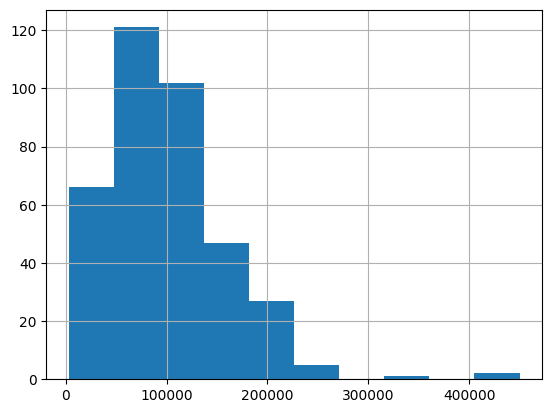

In [78]:
df['salary_in_usd'].hist()
plt.show()

Você pode ajustar a quantidade de intervalos em que os dados serão divididos usando o parâmetro `bins`.

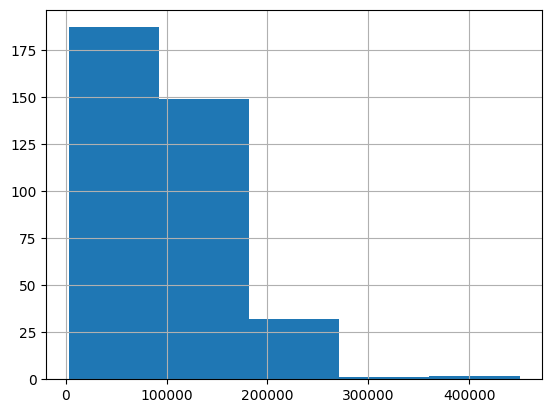

In [79]:
df['salary_in_usd'].hist(bins = 5)
plt.show()

## Barras

Para escolher um tipo de gráfico, é possível utilizar o método `plot` e parâmetro `kind`.

De fato, todos os tipos de gráfico podem ser feitos utilizando o método `.plot()`. A lista completa de gráficos possíveis pode ser vista [aqui](https://pandas.pydata.org/docs/user_guide/visualization.html) e incluem os seguintes tipos:

- `bar` ou `barh` para gráficos de barra;
- `hist` para histogramas;
- `box` para boxplot;
- `kde` ou `density` para densidade;
- `area` para gráficos de área;
- `scatter` para dispersão;
- `hexbin` para mapas exagonais;
- `pie` para gráficos de pizza.



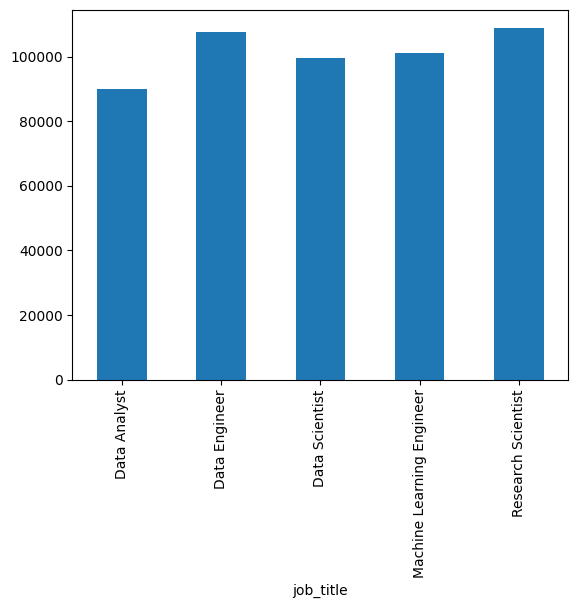

In [80]:
avg_salary = df.groupby('job_title')['salary_in_usd'].mean()
avg_salary.plot(kind='bar')
plt.show()

## Pizza

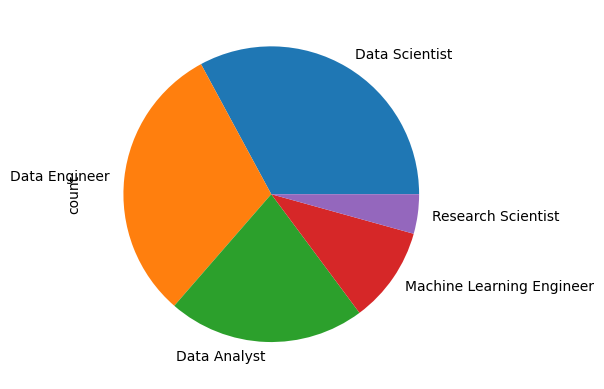

In [81]:
df['job_title'].value_counts().plot(kind='pie')
plt.show()

Podemos adicionar outros elementos no gráfico, como título e legenda.

In [82]:
df['job_title'].value_counts().index

Index(['Data Scientist', 'Data Engineer', 'Data Analyst',
       'Machine Learning Engineer', 'Research Scientist'],
      dtype='object', name='job_title')

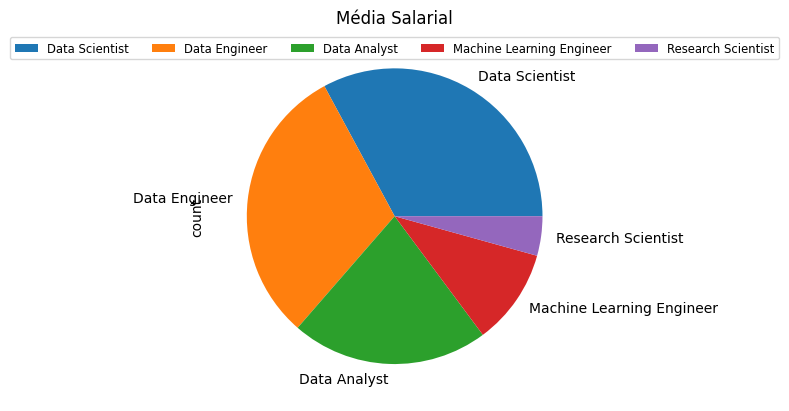

In [83]:
df['job_title'].value_counts().plot(kind='pie', title='Média Salarial')
plt.legend(df['job_title'].value_counts().index, loc='upper center', fontsize='small', ncols=5)
plt.show()

# Valores faltosos

Uma das tarefas mais importantes na análise de dados consiste em verificar se existem valores faltando no conjunto de dados.

Para exemplificar um conjunto com dados faltosos, vamos fazer uma nova importação da mesma base, mas onde alguns valores da coluna 'salary_in_usd' foram aleatoriamente removidos.

In [87]:
!wget 'https://raw.githubusercontent.com/danielsabino/IMD1101-AM-2024.1/main/data/ds_salaries2.csv'

--2024-06-26 16:05:05--  https://raw.githubusercontent.com/danielsabino/IMD1101-AM-2024.1/main/data/ds_salaries2.csv
Resolvendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Conectando-se a raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 37499 (37K) [text/plain]
Salvando em: ‘ds_salaries2.csv’

ds_salaries2.csv    100%[===================>]  36,62K  --.-KB/s    em 0,02s   

2024-06-26 16:05:05 (2,31 MB/s) - ‘ds_salaries2.csv’ salvo [37499/37499]



In [88]:
df2 = pd.read_csv('ds_salaries2.csv', sep=';')

## `.isna()`

Por meio do método `.isna()` conseguimos verificar para todos os campos da base se o dado está presente ou não.

In [89]:
df2.isna()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
602,False,False,False,False,False,False,False,False,False,False,False,False
603,False,False,False,False,False,False,False,False,False,False,False,False
604,False,False,False,False,False,False,False,False,False,False,False,False
605,False,False,False,False,False,False,False,False,False,False,False,False


No entato, quando a base se torna maior, essa visualização não é muito últil. Podemos usar o método `.any()` para avaliar se existe algum dados faltoso em cada coluna do DataFrame.

In [90]:
df2.isna().any()

Unnamed: 0            False
work_year             False
experience_level      False
employment_type       False
job_title             False
salary                False
salary_currency       False
salary_in_usd          True
employee_residence    False
remote_ratio          False
company_location      False
company_size          False
dtype: bool

Podemos ainda saber a quantidade de valores faltosos nas colunas por meio do método `.sum()`.

In [91]:
df2.isna().sum()

Unnamed: 0             0
work_year              0
experience_level       0
employment_type        0
job_title              0
salary                 0
salary_currency        0
salary_in_usd         12
employee_residence     0
remote_ratio           0
company_location       0
company_size           0
dtype: int64

Esse é um dado que pode ser visualizado.

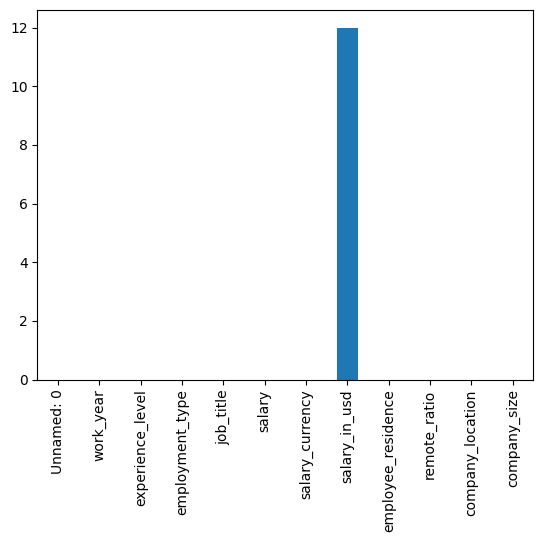

In [92]:
df2.isna().sum().plot(kind='bar')
plt.show()

Para tratar esse problema, podemos usar algumas abordagens. As duas mais comuns são: remover as linhas que possuem algum dado faltando ou preencher os campos que estão com valores faltando.

## `.dropna()`

Esse método simplesmente remove todas as linhas que possme valores faltando. Se não for especificado parâmetros, se alguma coluna tiver valores faltando, a linha é removida.

In [93]:
df2.dropna()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833.0,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000.0,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024.0,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000.0,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000.0,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000.0,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000.0,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000.0,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000.0,US,100,US,M


Mas, essa verificação pode ser feita considerando alguma(s) coluna(s) em específico.

In [94]:
df2.dropna(subset=['work_year'])

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833.0,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000.0,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024.0,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000.0,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000.0,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000.0,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000.0,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000.0,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000.0,US,100,US,M


Nesse caso, como a coluna `work_year` possui todos valores para todas as linhas, nenhuma foi removida.

## `.fillna()`

Uma outra forma de contornar o problema de dados faltosos é atribuir valores para preencher o campo. O método `.fillna` insere um valor pré-determinado toda vez que encontra um campo faltando dado. Podemos preencher, por exemplo, o campo com o valor 0.

In [95]:
df2.fillna(0)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833.0,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000.0,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024.0,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000.0,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000.0,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000.0,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000.0,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000.0,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000.0,US,100,US,M


Ou podemos preencher com um valor central, como a mediana.

In [96]:
med = np.median(df2['salary_in_usd'])
df2['salary_in_usd'].fillna('salary_in_usd', inplace=True)

/tmp/ipykernel_16783/2389571515.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['salary_in_usd'].fillna('salary_in_usd', inplace=True)
/tmp/ipykernel_16783/2389571515.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'salary_in_usd' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df2['salary_in_usd'].fillna('salary_in_usd', inplace=True)


Podemos verificar que não existem mais colunas com valores faltosos.

In [97]:
df2.isna().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64